In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../scripts/')
from chemevo import *

['Ca', 'Fe', 'H', 'He', 'Mg', 'O', 'S', 'Si', 'alpha']


TypeError: data type not understood

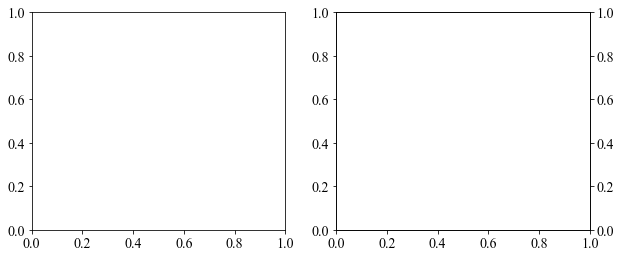

In [4]:
def gen_plot(fls=['/data/jls/chem_evo/results/singlezone.hdf5']):
    f,a=plt.subplots(1,2,figsize=[10.,4.])
    ax2 = a[1].twinx()
    colors = ['k','r']
    for CC,fl in enumerate(fls):
        sz = chem_evo_data(fl)
        plt.sca(a[0])
#         plt.plot(sz.abund['Fe'][0],sz.abund['O'][0]-sz.abund['Fe'][0]-0.1)
#         plt.plot(sz.abund['Fe'][0],sz.abund['Ca'][0]-sz.abund['Fe'][0]+0.1)
#         plt.plot(sz.abund['Fe'][0],sz.abund['Mg'][0]-sz.abund['Fe'][0]+0.1)
#         plt.plot(sz.abund['Fe'][0],sz.abund['Si'][0]-sz.abund['Fe'][0])
#         plt.plot(sz.abund['Fe'][0],sz.abund['S'][0]-sz.abund['Fe'][0])
        for ii in [2.,8.,14.]:
            indx = np.argmin(np.abs(sz.R-ii))
            plt.plot(sz.abund['Fe'][indx],sz.abund['alpha'][indx]-sz.abund['Fe'][indx],color=colors[CC])
        for i in range(len(sz.abund['Fe'])):
            plt.plot(sz.abund['Fe'][i],sz.abund['alpha'][i]-sz.abund['Fe'][i],'.',color=colors[CC],alpha=0.1,ms=10)
        plt.xlim(-2.,0.5)
        plt.ylim(-0.3,0.4)
        plt.sca(a[1])
        for ii in [8.]:
            indx = np.argmin(np.abs(sz.R-ii))
            plt.plot(sz.t,sz.Mgas.T[indx],color=colors[CC])
        plt.semilogy()
#         plt.plot(sz.t,sz.Mstar)
        plt.sca(ax2)
        plt.plot(sz.t,sz.SFR,ls='dashed',color=colors[CC])
#         plt.plot(sz.t,sz.Inflow)
#         plt.plot(sz.t,sz.SNIa*1000)
#         plt.plot(sz.t,sz.SNII*200)
        plt.semilogy()
    plt.ylabel(r'SFR/$M_\odot/\mathrm{Gyr/kpc}^2$')
    plt.sca(a[1])
    plt.ylabel(r'Gas mass$/M_\odot/\mathrm{kpc}^2$')
    plt.xlabel(r'Time/Gyr')
    plt.sca(a[0])
    plt.xlabel(r'[Fe/H]')
    plt.ylabel(r'[$\alpha$/Fe]')
    plt.tight_layout()
gen_plot()

[u'Ca', u'Fe', u'H', u'He', u'Mg', u'O', u'S', u'Si', u'alpha']


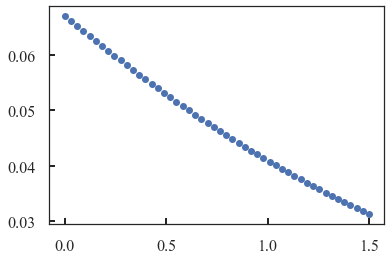

In [4]:
sz = chem_evo_data('/data/jls/chem_evo/results/singlezone.hdf5')
plt.plot(sz.t,(sz.SFR/sz.Mgas.T**1.4).T,'.');

IOError: Unable to open file (file read failed: time = Mon Oct  8 12:28:27 2018
, filename = '/', file descriptor = 55, errno = 21, error message = 'Is a directory', buf = 0x7fff0c4c89b0, total read size = 8, bytes this sub-read = 8, bytes actually read = 18446744073709551615, offset = 0)

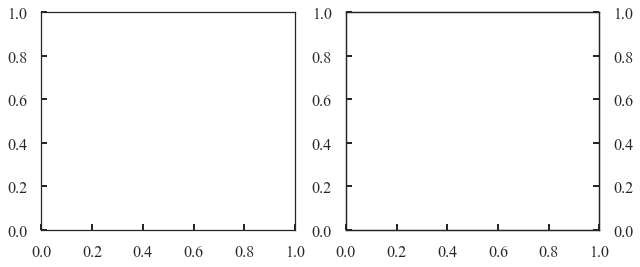

In [6]:
gen_plot('/data/jls/chem_evo/results/singlezone2.hdf5')

[u'Ca', u'Fe', u'H', u'He', u'Mg', u'O', u'S', u'Si', u'alpha']


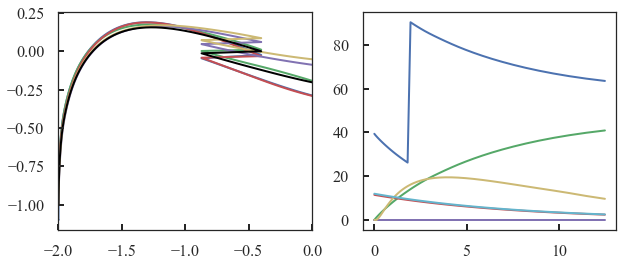

In [84]:
gen_plot('/data/jls/chem_evo/results/singlezone_dump.hdf5')

[u'Ca', u'Fe', u'H', u'He', u'Mg', u'O', u'S', u'Si', u'alpha']
[u'Ca', u'Fe', u'H', u'He', u'Mg', u'O', u'S', u'Si', u'alpha']


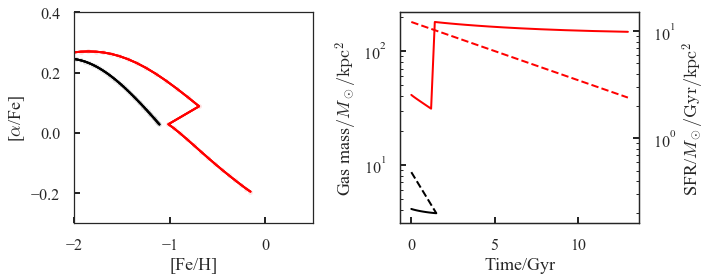

In [7]:
gen_plot(['/data/jls/chem_evo/results/singlezone.hdf5',
          '/data/jls/chem_evo/results/singlezone_dump.hdf5'])
plt.savefig('scenario.png', bbox_inches='tight',dpi=200)

[u'Fe', u'H', u'He', u'Si', u'alpha']
[u'Ca', u'Fe', u'H', u'He', u'Mg', u'O', u'S', u'Si', u'alpha']


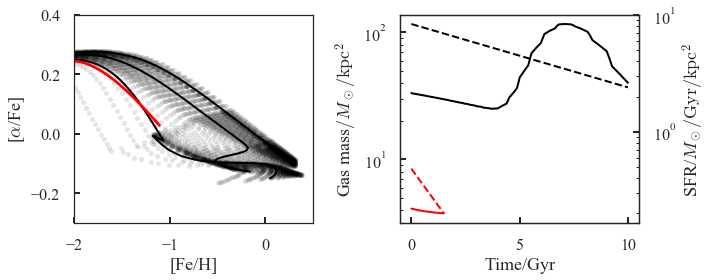

In [47]:
A = gen_plot(['/data/jls/chem_evo/results/singlezone_multizone_dump.hdf5',
             '/data/jls/chem_evo/results/singlezone.hdf5'
             ])
plt.savefig('scenario_multizone.png',bbox_inches='tight',dpi=200)

In [76]:
sz = chem_evo_data('/data/jls/chem_evo/results/singlezone_multizone_dump.hdf5')

[u'Fe', u'H', u'He', u'Si', u'alpha']


In [78]:
sz.R.T[26]

8.053061224489795

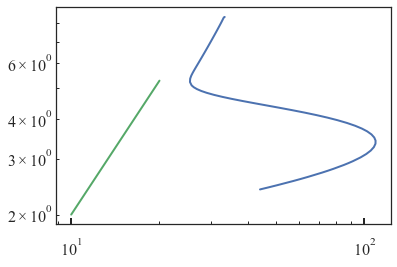

In [79]:
plt.plot(sz.Mgas.T[26],sz.SFR);
plt.semilogy()
plt.semilogx()
xx = np.linspace(1.,2.)
plt.plot(xx*10.,2.*xx**1.4)

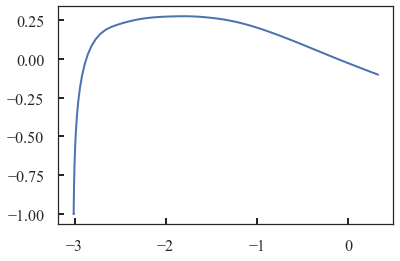

In [40]:
plt.plot(sz.abund['Fe'][6]-sz.abund['H'][6],sz.abund['Si'][6]-sz.abund['Fe'][6]);

In [80]:
apogee = pd.read_csv('/data/jls/edf/apogee_sample/full_sample_Padova_we_GASDUMP.chem')

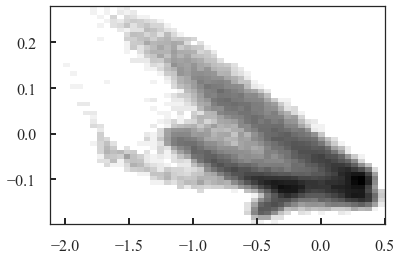

In [81]:
from matplotlib.colors import LogNorm
plt.hist2d(apogee.Fe+np.random.normal(0.,0.04,size=len(apogee)),
         apogee.Si-apogee.Fe+np.random.normal(0.,0.01,size=len(apogee)),bins=50,norm=LogNorm());

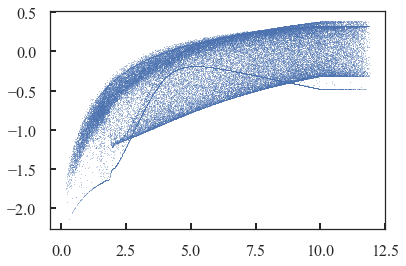

In [84]:
plt.plot(apogee.age,apogee.Fe,'.',ms=1)

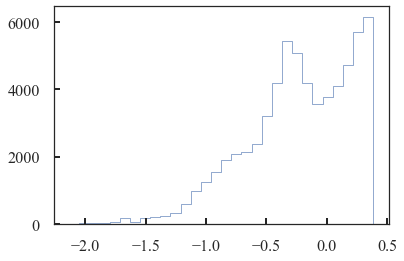

In [86]:
plt.hist(apogee.Fe,histtype='step',bins=30);

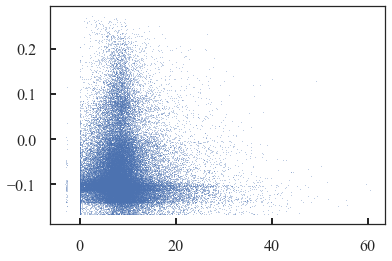

In [93]:
plt.plot(apogee.Rc,apogee.Si-apogee.Fe,'.',ms=1)